In [1]:
import pymskt as mskt
import glob
import os
import numpy as np

- Get a list of the meshes that we want to include in the model

In [2]:
loc_meshes = '../../data/femur_meshes_registration/'
list_mesh_paths = glob.glob(os.path.join(loc_meshes, '*_RIGHT_femur_Nov_02_2021.vtk'))

- Run the ICP protocol to find the mesh with the smallest surface distance to all other meshes in the dataset

In [3]:
find_ref_mesh = mskt.statistics.FindReferenceMeshICP(
    list_mesh_paths=list_mesh_paths
)
find_ref_mesh.execute()

Starting registrations, there are 5 meshes
	Starting target mesh 0
		Starting source mesh 0
		Starting source mesh 1
		Starting source mesh 2
		Starting source mesh 3
		Starting source mesh 4
	Starting target mesh 1
		Starting source mesh 0
		Starting source mesh 1
		Starting source mesh 2
		Starting source mesh 3
		Starting source mesh 4
	Starting target mesh 2
		Starting source mesh 0
		Starting source mesh 1
		Starting source mesh 2
		Starting source mesh 3
		Starting source mesh 4
	Starting target mesh 3
		Starting source mesh 0
		Starting source mesh 1
		Starting source mesh 2
		Starting source mesh 3
		Starting source mesh 4
	Starting target mesh 4
		Starting source mesh 0
		Starting source mesh 1
		Starting source mesh 2
		Starting source mesh 3
		Starting source mesh 4
Finished all registrations!


- Print out the mesh idx (just so we know)

In [4]:
find_ref_mesh.ref_idx

0

- Print out the registration error matrix (symmetric surface distance in _mm_).
    - The row indicates the mesh used as the target (our reference)
    - The column indicates the mesh used as the source (what was transformed to our reference). 
- We want the mesh that has the smallest surface errors to all other meshes. 

In [5]:
find_ref_mesh.symm_surface_distances

array([[0.        , 1.12702556, 1.29678837, 0.81144045, 0.92458922],
       [1.50598792, 0.        , 1.58860077, 1.40931963, 1.54795171],
       [1.54729599, 1.40470815, 0.        , 1.41524974, 1.41171445],
       [0.90212259, 1.16492056, 1.31291165, 0.        , 1.04687463],
       [1.10369228, 1.3528002 , 1.42490595, 1.12489738, 0.        ]])

- Now, lets calcualte the mean error for each target mesh and print it out. 
    - The index with the lowest value will be our template. 

In [6]:
mean_errors = np.mean(find_ref_mesh.symm_surface_distances, axis=1)
print(mean_errors)

[0.83196872 1.21037201 1.15579367 0.88536589 1.00125916]


Text(0.5, 1.0, 'Box Plots of Symm Surface Error for each Template Mesh')

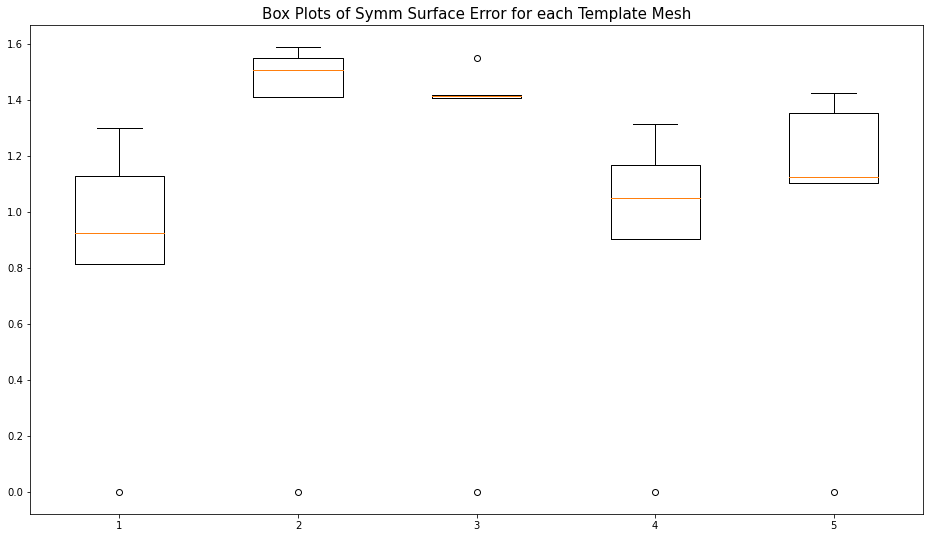

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,9))
plt.boxplot(find_ref_mesh.symm_surface_distances.T)
plt.title('Box Plots of Symm Surface Error for each Template Mesh', fontsize=15)

In [8]:
procrustes_reg = mskt.statistics.ProcrustesRegistration(
    path_ref_mesh=list_mesh_paths[find_ref_mesh.ref_idx], # using the idx of the best mesh from the previous step
    list_mesh_paths=list_mesh_paths, # This will automatically remove the ref_mesh path if it is in the list.
    n_spectral_features=20,
    projection_smooth_iterations=40,
    graph_smoothing_iterations=300,  
    max_n_registration_steps=1,
    icp_registration_mode='similarity'  # This default & removes scale by isotropically scaling during regisration 
                                        # To not scale during registration, use mode 'rigid'.
)

procrustes_reg.execute()

Starting registration round 0
	Registering to mesh # 0
	Registering to mesh # 1
Starting Focusr
Starting ICP
Starting to build first graph
Loaded Mesh 1
Beginning Eigen Decomposition
Starting!
All final eigenvalues are: 
[-1.00380302e-17  2.30590743e-04  3.59687150e-04  5.18765870e-04
  8.09465157e-04  9.96780572e-04  1.04112064e-03  1.29675662e-03
  1.43316868e-03  1.64611011e-03  1.92477145e-03  1.93758193e-03
  2.26726280e-03  2.42458962e-03  2.59780056e-03  2.69616120e-03
  2.73929823e-03  3.16132168e-03  3.36328921e-03  3.49594233e-03
  3.70575568e-03  3.89098790e-03  4.01225225e-03  4.17022216e-03]
------------------------------------------------------------------------
Final eigenvalues of interest are: 
[0.00023059 0.00035969 0.00051877 0.00080947 0.00099678 0.00104112
 0.00129676 0.00143317 0.00164611 0.00192477 0.00193758 0.00226726
 0.00242459 0.0025978  0.00269616 0.0027393  0.00316132 0.00336329
 0.00349594 0.00370576 0.00389099 0.00401225 0.00417022]
Computed spectrum 1
L

Iteration:31
ML:-59969.535; 	ML change (error):     0.031; 	Sigma^2:     0.002; 	Sigma^2 change:    -0.000
[====                                                                    ]
Iteration:32
ML:-59969.572; 	ML change (error):     0.038; 	Sigma^2:     0.002; 	Sigma^2 change:    -0.000
[====                                                                    ]
Iteration:33
ML:-59969.636; 	ML change (error):     0.064; 	Sigma^2:     0.002; 	Sigma^2 change:    -0.000
[====                                                                    ]
Iteration:34
ML:-59969.788; 	ML change (error):     0.152; 	Sigma^2:     0.002; 	Sigma^2 change:     0.000
[====                                                                    ]
Iteration:35
ML:-59970.270; 	ML change (error):     0.482; 	Sigma^2:     0.002; 	Sigma^2 change:     0.000
[=====                                                                   ]
Iteration:36
ML:-59971.465; 	ML change (error):     1.195; 	Sigma^2:     0.002; 	Sigma^2 c

Iteration:79
ML:-59980.578; 	ML change (error):     0.000; 	Sigma^2:     0.002; 	Sigma^2 change:     0.000
[===========                                                             ]
Iteration:80
ML:-59980.578; 	ML change (error):     0.000; 	Sigma^2:     0.002; 	Sigma^2 change:     0.000
[===========                                                             ]
Iteration:81
ML:-59980.578; 	ML change (error):     0.000; 	Sigma^2:     0.002; 	Sigma^2 change:     0.000
[===========                                                             ]
Iteration:82
ML:-59980.578; 	ML change (error):     0.000; 	Sigma^2:     0.002; 	Sigma^2 change:     0.000
[===========                                                             ]
Iteration:83
ML:-59980.578; 	ML change (error):     0.000; 	Sigma^2:     0.002; 	Sigma^2 change:     0.000
[===========                                                             ]
Iteration:84
ML:-59980.578; 	ML change (error):     0.000; 	Sigma^2:     0.002; 	Sigma^2 c

Beginning Eigen Decomposition
Starting!
All final eigenvalues are: 
[-9.77669535e-18  2.25805833e-04  3.66459027e-04  5.05447162e-04
  8.02476563e-04  1.00400922e-03  1.05255896e-03  1.29327148e-03
  1.42160764e-03  1.68500660e-03  1.89392890e-03  1.94752650e-03
  2.24977942e-03  2.36843928e-03  2.57285727e-03  2.68403424e-03
  2.79090514e-03  3.17695294e-03  3.42505867e-03  3.54689362e-03
  3.70747185e-03  3.87766577e-03  3.97535312e-03  4.04794116e-03]
------------------------------------------------------------------------
Final eigenvalues of interest are: 
[0.00022581 0.00036646 0.00050545 0.00080248 0.00100401 0.00105256
 0.00129327 0.00142161 0.00168501 0.00189393 0.00194753 0.00224978
 0.00236844 0.00257286 0.00268403 0.00279091 0.00317695 0.00342506
 0.00354689 0.00370747 0.00387767 0.00397535 0.00404794]
Computed spectrum 2

Eigenvector Sorting Results

The matches for eigenvectors were as follows:
Target	|  Source
     0	|  -0    
     1	|  1     
     2	|  -2    
     3	|  

Iteration:39
ML:-56896.463; 	ML change (error):     0.288; 	Sigma^2:     0.002; 	Sigma^2 change:     0.000
[=====                                                                   ]
Iteration:40
ML:-56896.634; 	ML change (error):     0.172; 	Sigma^2:     0.002; 	Sigma^2 change:     0.000
[=====                                                                   ]
Iteration:41
ML:-56896.741; 	ML change (error):     0.107; 	Sigma^2:     0.002; 	Sigma^2 change:     0.000
[=====                                                                   ]
Iteration:42
ML:-56896.819; 	ML change (error):     0.078; 	Sigma^2:     0.002; 	Sigma^2 change:     0.000
[======                                                                  ]
Iteration:43
ML:-56896.881; 	ML change (error):     0.061; 	Sigma^2:     0.002; 	Sigma^2 change:     0.000
[======                                                                  ]
Iteration:44
ML:-56896.929; 	ML change (error):     0.048; 	Sigma^2:     0.002; 	Sigma^2 c

Iteration:85
ML:-56897.409; 	ML change (error):     0.022; 	Sigma^2:     0.002; 	Sigma^2 change:     0.000
[============                                                            ]
Iteration:86
ML:-56897.444; 	ML change (error):     0.036; 	Sigma^2:     0.002; 	Sigma^2 change:     0.000
[============                                                            ]
Iteration:87
ML:-56897.502; 	ML change (error):     0.058; 	Sigma^2:     0.002; 	Sigma^2 change:     0.000
[============                                                            ]
Iteration:88
ML:-56897.593; 	ML change (error):     0.091; 	Sigma^2:     0.002; 	Sigma^2 change:     0.000
[============                                                            ]
Iteration:89
ML:-56897.719; 	ML change (error):     0.126; 	Sigma^2:     0.002; 	Sigma^2 change:     0.000
[============                                                            ]
Iteration:90
ML:-56897.856; 	ML change (error):     0.137; 	Sigma^2:     0.002; 	Sigma^2 c

Iteration:134
ML:-56902.189; 	ML change (error):     0.080; 	Sigma^2:     0.002; 	Sigma^2 change:     0.000
[===================                                                     ]
Iteration:135
ML:-56902.230; 	ML change (error):     0.041; 	Sigma^2:     0.002; 	Sigma^2 change:     0.000
[===================                                                     ]
Iteration:136
ML:-56902.251; 	ML change (error):     0.021; 	Sigma^2:     0.002; 	Sigma^2 change:     0.000
[===================                                                     ]
Iteration:137
ML:-56902.262; 	ML change (error):     0.011; 	Sigma^2:     0.002; 	Sigma^2 change:     0.000
[===================                                                     ]
Iteration:138
ML:-56902.268; 	ML change (error):     0.006; 	Sigma^2:     0.002; 	Sigma^2 change:     0.000
[===================                                                     ]
Iteration:139
ML:-56902.272; 	ML change (error):     0.004; 	Sigma^2:     0.002; 	Sig

Iteration:181
ML:-56902.281; 	ML change (error):     0.000; 	Sigma^2:     0.002; 	Sigma^2 change:    -0.000
[==========================                                              ]
Iteration:182
ML:-56902.281; 	ML change (error):     0.000; 	Sigma^2:     0.002; 	Sigma^2 change:    -0.000
[==========================                                              ]
Iteration:183
ML:-56902.281; 	ML change (error):     0.000; 	Sigma^2:     0.002; 	Sigma^2 change:    -0.000
[==========================                                              ]
Iteration:184
ML:-56902.281; 	ML change (error):     0.000; 	Sigma^2:     0.002; 	Sigma^2 change:    -0.000
[==========================                                              ]
Iteration:185
ML:-56902.281; 	ML change (error):     0.000; 	Sigma^2:     0.002; 	Sigma^2 change:    -0.000
[==========================                                              ]
Iteration:186
ML:-56902.281; 	ML change (error):     0.000; 	Sigma^2:     0.002; 	Sig

Starting to build first graph
Loaded Mesh 1
Beginning Eigen Decomposition
Starting!
Fiedler found, not enough eig_vals - Restarting
Starting!
All final eigenvalues are: 
[ 2.58493941e-26 -9.95402367e-18  2.16434150e-04  3.74870297e-04
  5.20945248e-04  8.11280264e-04  9.73219257e-04  1.01900552e-03
  1.33789746e-03  1.44057968e-03  1.66427915e-03  1.90443652e-03
  1.93856786e-03  2.20695959e-03  2.41504104e-03  2.58386775e-03
  2.69491148e-03  2.77586788e-03  3.12725021e-03  3.43023409e-03
  3.47745739e-03  3.66871050e-03  3.83583874e-03  4.04215722e-03
  4.12104550e-03  4.37633647e-03]
------------------------------------------------------------------------
Final eigenvalues of interest are: 
[0.00021643 0.00037487 0.00052095 0.00081128 0.00097322 0.00101901
 0.0013379  0.00144058 0.00166428 0.00190444 0.00193857 0.00220696
 0.00241504 0.00258387 0.00269491 0.00277587 0.00312725 0.00343023
 0.00347746 0.00366871 0.00383584 0.00404216 0.00412105]
Computed spectrum 1
Loaded Mesh 2
Begin

Iteration:31
ML:-60156.184; 	ML change (error):     0.242; 	Sigma^2:     0.002; 	Sigma^2 change:     0.000
[====                                                                    ]
Iteration:32
ML:-60156.426; 	ML change (error):     0.242; 	Sigma^2:     0.002; 	Sigma^2 change:     0.000
[====                                                                    ]
Iteration:33
ML:-60156.658; 	ML change (error):     0.232; 	Sigma^2:     0.002; 	Sigma^2 change:     0.000
[====                                                                    ]
Iteration:34
ML:-60156.807; 	ML change (error):     0.149; 	Sigma^2:     0.002; 	Sigma^2 change:     0.000
[====                                                                    ]
Iteration:35
ML:-60156.880; 	ML change (error):     0.073; 	Sigma^2:     0.002; 	Sigma^2 change:     0.000
[=====                                                                   ]
Iteration:36
ML:-60156.924; 	ML change (error):     0.045; 	Sigma^2:     0.002; 	Sigma^2 c

Iteration:77
ML:-60159.019; 	ML change (error):     0.000; 	Sigma^2:     0.002; 	Sigma^2 change:     0.000
[===========                                                             ]
Iteration:78
ML:-60159.019; 	ML change (error):     0.000; 	Sigma^2:     0.002; 	Sigma^2 change:     0.000
[===========                                                             ]
Iteration:79
ML:-60159.019; 	ML change (error):     0.000; 	Sigma^2:     0.002; 	Sigma^2 change:     0.000
[===========                                                             ]
Iteration:80
ML:-60159.019; 	ML change (error):     0.000; 	Sigma^2:     0.002; 	Sigma^2 change:     0.000
[===========                                                             ]
Iteration:81
ML:-60159.019; 	ML change (error):     0.000; 	Sigma^2:     0.002; 	Sigma^2 change:     0.000
[===========                                                             ]
Iteration:82
ML:-60159.019; 	ML change (error):     0.000; 	Sigma^2:     0.002; 	Sigma^2 c

Iteration:6
ML:-59116.812; 	ML change (error):    49.562; 	Sigma^2:     0.002; 	Sigma^2 change:     0.000
[                                                                        ]
Iteration:7
ML:-59136.792; 	ML change (error):    19.980; 	Sigma^2:     0.002; 	Sigma^2 change:     0.000
[=                                                                       ]
Iteration:8
ML:-59155.042; 	ML change (error):    18.250; 	Sigma^2:     0.002; 	Sigma^2 change:     0.000
[=                                                                       ]
Iteration:9
ML:-59171.137; 	ML change (error):    16.095; 	Sigma^2:     0.002; 	Sigma^2 change:     0.000
[=                                                                       ]
Iteration:10
ML:-59184.462; 	ML change (error):    13.326; 	Sigma^2:     0.002; 	Sigma^2 change:     0.000
[=                                                                       ]
Iteration:11
ML:-59199.462; 	ML change (error):    15.000; 	Sigma^2:     0.002; 	Sigma^2 chang

Iteration:52
ML:-59223.994; 	ML change (error):     0.000; 	Sigma^2:     0.002; 	Sigma^2 change:    -0.000
[=======                                                                 ]
Iteration:53
ML:-59223.994; 	ML change (error):     0.000; 	Sigma^2:     0.002; 	Sigma^2 change:    -0.000
[=======                                                                 ]
Iteration:54
ML:-59223.994; 	ML change (error):     0.000; 	Sigma^2:     0.002; 	Sigma^2 change:    -0.000
[=======                                                                 ]
Iteration:55
ML:-59223.994; 	ML change (error):     0.000; 	Sigma^2:     0.002; 	Sigma^2 change:    -0.000
[=======                                                                 ]
Iteration:56
ML:-59223.994; 	ML change (error):     0.000; 	Sigma^2:     0.002; 	Sigma^2 change:    -0.000
[========                                                                ]
Iteration:57
ML:-59223.994; 	ML change (error):     0.000; 	Sigma^2:     0.002; 	Sigma^2 c

Iteration:99
ML:-59223.994; 	ML change (error):     0.000; 	Sigma^2:     0.002; 	Sigma^2 change:    -0.000
[==============                                                          ]
Iteration:100
ML:-59223.994; 	ML change (error):     0.000; 	Sigma^2:     0.002; 	Sigma^2 change:    -0.000
[==============                                                          ]
Iteration:101
ML:-59223.994; 	ML change (error):     0.000; 	Sigma^2:     0.002; 	Sigma^2 change:     0.000
[==============                                                          ]
Iteration:102
ML:-59223.994; 	ML change (error):     0.000; 	Sigma^2:     0.002; 	Sigma^2 change:    -0.000
[==============                                                          ]
Iteration:103
ML:-59223.994; 	ML change (error):     0.000; 	Sigma^2:     0.002; 	Sigma^2 change:     0.000
[==============                                                          ]
Iteration:104
ML:-59223.994; 	ML change (error):     0.000; 	Sigma^2:     0.002; 	Sigm

In [9]:
from itkwidgets import view

- Create a plot with all of the meshes using their new mesh topology that matches the reference mesh on a point-by-point basis. 
- The final mesh (5) is the reference mesh (mean of all of the meshes). 

In [10]:
list_meshes = []
for idx in range(procrustes_reg.registered_pt_coords.shape[0]):
    mean_mesh = mskt.mesh.utils.vtk_deep_copy(procrustes_reg.ref_mesh)
    mskt.mesh.meshTools.set_mesh_physical_point_coords(mean_mesh, procrustes_reg.registered_pt_coords[idx, :, :])
    list_meshes.append(mean_mesh)

view(geometries=list_meshes + [procrustes_reg.ref_mesh])

Viewer(geometries=[{'vtkClass': 'vtkPolyData', 'points': {'vtkClass': 'vtkPoints', 'name': '_points', 'numberO…

- We can save all of the registered meshes to disk

In [11]:
# You may specify the "folder" inpu/Users/gattia/Downloads/ do, all of the meshes will be save to this location. A unique
# suffix will be added to each mesh before saving to ensure they are distinguishable, even if they origainlly
# all had the same names. 
# Otherwise, each mesh will be saved to the folder it was loaded from, but with the new/unique file extension. 
procrustes_reg.save_meshes(folder='~/Downloads/test')

- the corresponding points for the registered meshes are located inside of the `procrustes_reg` object. These corresponding points can be used for any statistical/data analyses that you want. Next we demonstrate creating a basic statistical shape model using Principal Components Analysis (PCA). 

- Create data array to input for SSM

In [12]:
# print shape of data
print(procrustes_reg.registered_pt_coords.shape)

(5, 19998, 3)


In [13]:
points = np.zeros((procrustes_reg.registered_pt_coords.shape[0], 
                   procrustes_reg.registered_pt_coords.shape[1] * procrustes_reg.registered_pt_coords.shape[2]))
for idx in range(procrustes_reg.registered_pt_coords.shape[0]):
    points[idx, :] = procrustes_reg.registered_pt_coords[idx,:,:].flatten()

print(points.shape)

(5, 59994)


- Get point coordinates for the reference / mean mesh

In [14]:
mean_coords = mskt.mesh.meshTools.get_mesh_physical_point_coords(procrustes_reg.ref_mesh)

- Compute principal components (PCs) and their variances (Vs)

In [15]:
PCs, Vs = mskt.statistics.pca.pca_svd(points.T)

- Generate new meshes from extremes of first principal component

In [18]:
pts_minus_2_sd = mskt.statistics.pca.get_ssm_deformation(PCs, Vs, mean_coords, pc=0, n_sds=-2)
mesh_minus_2_sd = mskt.statistics.pca.create_vtk_mesh_from_deformed_points(procrustes_reg.ref_mesh, pts_minus_2_sd)

pts_plus_2_sd = mskt.statistics.pca.get_ssm_deformation(PCs, Vs, mean_coords, pc=0, n_sds=2)
mesh_plus_2_sd = mskt.statistics.pca.create_vtk_mesh_from_deformed_points(procrustes_reg.ref_mesh, pts_plus_2_sd)

- Display meshes demonstrating the first PC (-2SD, Mean, +2SD)
    - You can hide different meshes to highlight which part of the distribution you want to see. 
- +/- 2SD is used for this example in part because the small dataset (n=5) leads to rougher surface when interpolating to greater extremes (+/-3SD). 
- If you look at the +/- 2SD meshes you can notice certain features.
    - One extreme has a narrow intercondylar notch, the other has a wide notch. 
    - There are also considerable differences in the concavity of the trochlea
    

In [19]:
view(geometries=[mesh_minus_2_sd, procrustes_reg.ref_mesh, mesh_plus_2_sd])

Viewer(geometries=[{'vtkClass': 'vtkPolyData', 'points': {'vtkClass': 'vtkPoints', 'name': '_points', 'numberO…

- Save multiple meshes spanning the distribution of a particular principal component. 
    - These can be loaded in Paraview (https://www.paraview.org/) and viewed. If you open them all in paraview you can save photos of each mesh (without moving the camera) and use https://ezgif.com/ to make a visualization of how the mesh deforms from one extreme of the distribution to the other - Make sure to name the image files sequentially so that you can sort the images when uploading to ezgif!

In [22]:
pc = 0
min_sd = -2
max_sd = 2
step = 0.25

loc_save_meshes = os.path.join('~/Downloads', f'ssm_meshes_PC_{pc}')
os.makedirs(loc_save_meshes, exist_ok=True)

for sd in np.arange(min_sd, max_sd + step, step):
    pts = mskt.statistics.pca.get_ssm_deformation(PCs, Vs, mean_coords, pc=pc, n_sds=sd)
    mesh = mskt.statistics.pca.create_vtk_mesh_from_deformed_points(procrustes_reg.ref_mesh, pts)
    filename = f'ssm_mode_{pc}_sd_{sd}.vtk'
    mskt.mesh.io.write_vtk(mesh, os.path.join(loc_save_meshes, filename))
    

- To do statistics, you can score each bone on the PCs. 

In [24]:
# how many PCs to score
max_pc = 10

centered_data = points - mean_coords.flatten()
scores = PCs[:,:max_pc].T @ centered_data.T
scores = scores / (np.sqrt(Vs)[:max_pc, None])

- Plot them

In [26]:
scores.shape

(5, 5)

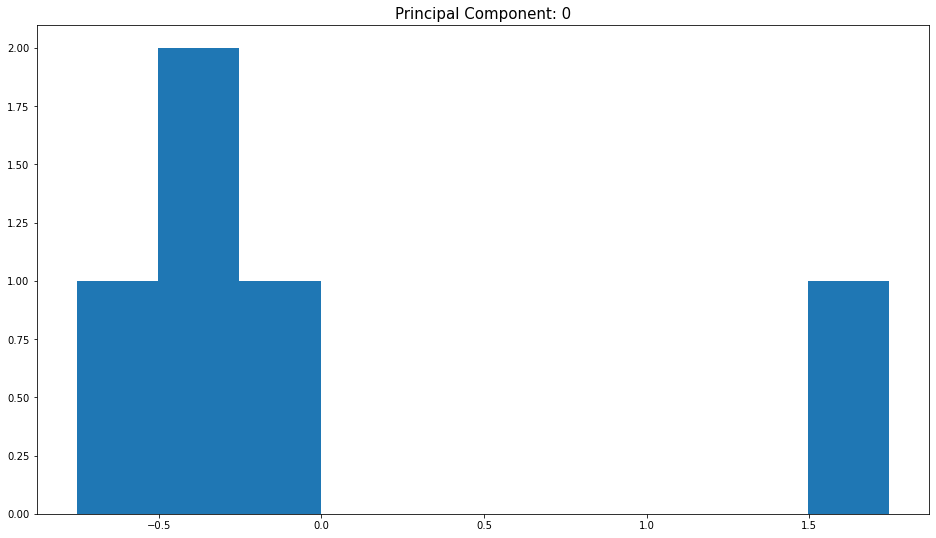

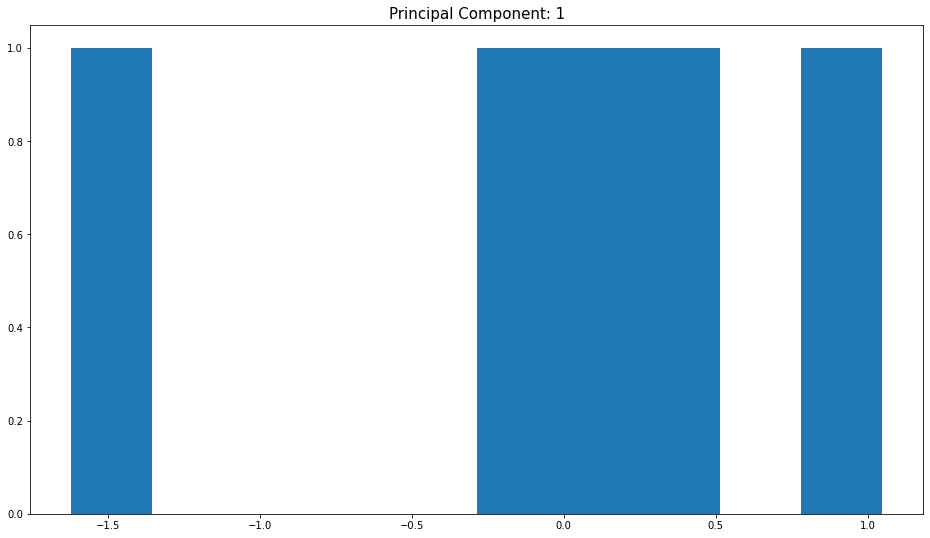

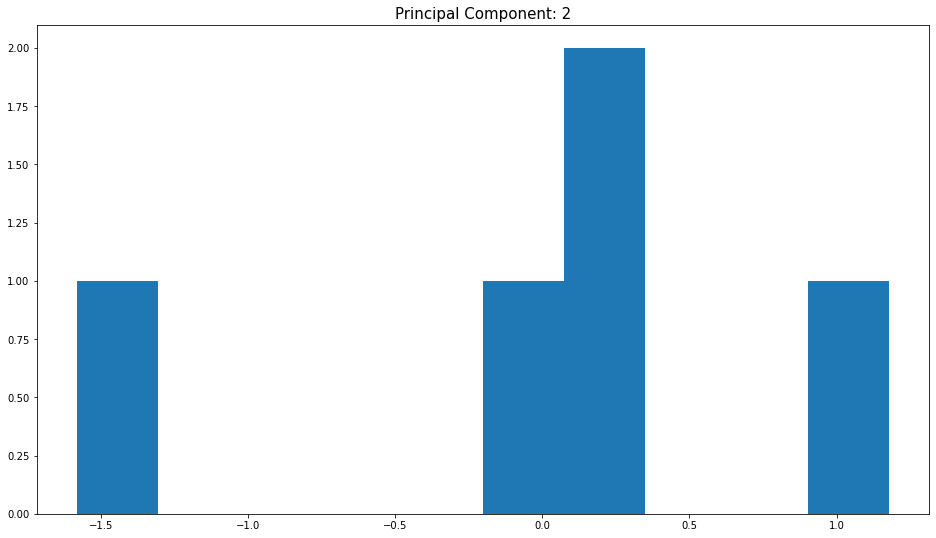

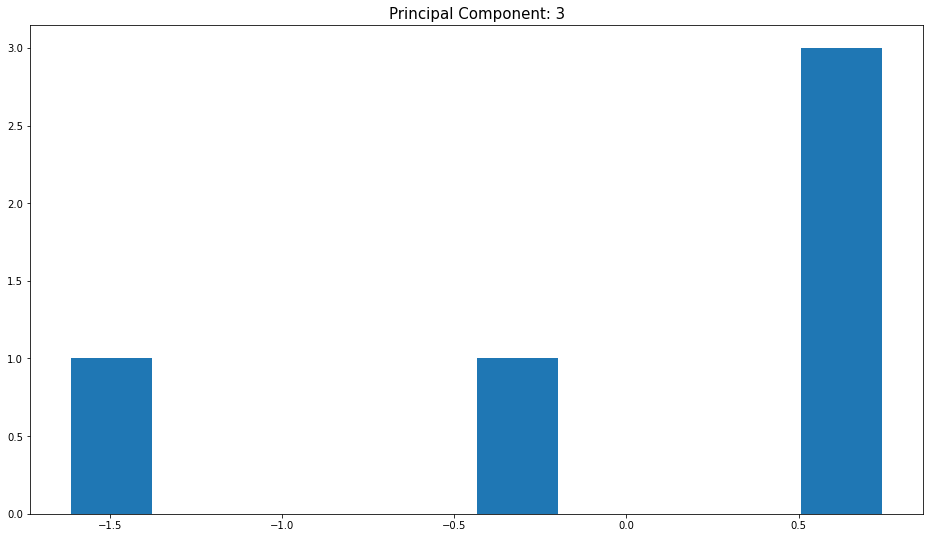

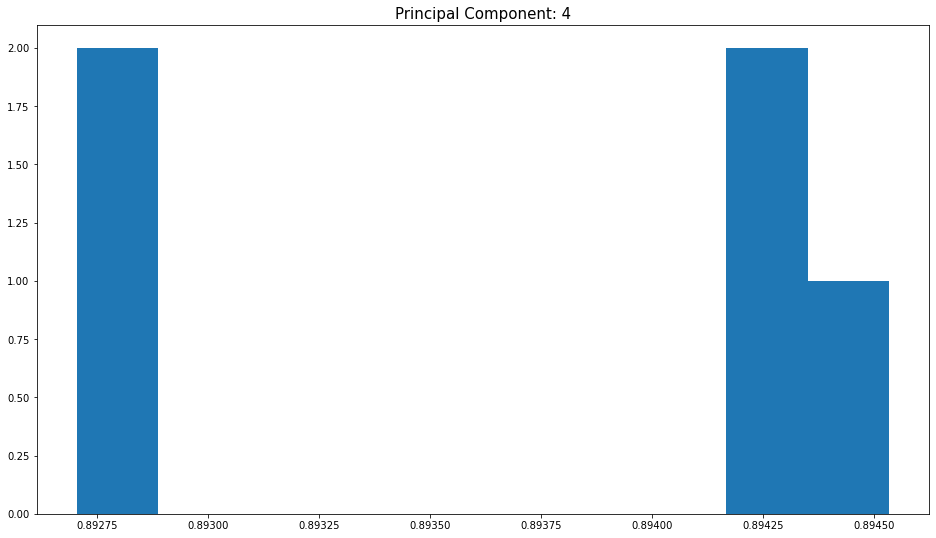

In [27]:
for idx in range(min(scores.shape[0], max_pc)):
    plt.figure(figsize=(16,9))
    plt.hist(scores[idx, :])
    plt.title(f'Principal Component: {idx}', fontsize=15)